In [18]:
#Import libraries
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
import pickle
from sklearn import svm

# Pembentukan Model NB dan SVM

In [55]:
df = pd.read_csv('tweet_gabungan.csv') #read the CSV file
data_label = df['Labeled Data']
label = df['Label']
df.head(5)

,Label,Labeled Data,Weight
0,neutral,['find location near dc first responder corona...,0 + 0 + 0 + 0 + 0 + 0 + 0 = 0
1,positive,['point another excellent example partnership ...,0 + 0 + 1 + 0 + 0 + 1 + 0 + 0 + 0 + 0 = 2
2,positive,['lot millennials would also want india beauti...,0 + 0 + 0 + 0 + 0 + 0 + 1 + 0 + 0 + 0 = 1
3,neutral,['thing happen marriege going court soon'],0 + 0 + 0 + 0 + 0 + 0 = 0
4,negative,['corona virus case people still taking thing ...,0 + -1 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + ...


In [56]:
#Split the data into 80% training (X_train & y_train) and 20% testing (X_test & y_test) data sets
from sklearn.cross_validation  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_label, label, test_size = 0.20, random_state = 0)

In [57]:
# Get the shape of messages_bow
# messages_bow.shape
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize email text into tfidf matrix
# TfidfVectorizer converts collection of raw documents to a matrix of TF-IDF features.
# It's equivalent to CountVectorizer followed by TfidfTransformer.
vectorizer = TfidfVectorizer(
    input='content',     # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(X_train)
features_test_transformed  = vectorizer.transform(X_test)


C:\Users\Mon\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [58]:
#Create and train the Naive Bayes classifier
#The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(features_train_transformed, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_Clasifier = svm.SVC(C=1.0, kernel='linear', degree=8, gamma='auto')
SVM_Clasifier.fit(features_train_transformed,y_train)

# predict the labels on validation dataset


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=8, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = NB_classifier.predict(features_train_transformed)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
predictions_SVM = SVM_Clasifier.predict(features_train_transformed)
print(classification_report(y_train ,predictions_SVM ))
print('Confusion Matrix: \n',confusion_matrix(y_train,predictions_SVM))
print()
print('Accuracy: ', accuracy_score(y_train,predictions_SVM))

             precision    recall  f1-score   support

   negative       0.97      0.71      0.82       493
    neutral       0.71      0.99      0.83       975
   positive       0.99      0.34      0.50       372

avg / total       0.84      0.78      0.76      1840

Confusion Matrix: 
 [[348 145   0]
 [  4 970   1]
 [  5 242 125]]

Accuracy:  0.7842391304347827
             precision    recall  f1-score   support

   negative       0.93      0.91      0.92       493
    neutral       0.91      0.97      0.94       975
   positive       0.96      0.82      0.89       372

avg / total       0.92      0.92      0.92      1840

Confusion Matrix: 
 [[450  42   1]
 [ 22 942  11]
 [ 14  53 305]]

Accuracy:  0.9222826086956522


In [61]:
import pickle

# def save(vectorizer, classifier):
#     '''
#     save classifier to disk
#     '''
with open('cls_model.pkl', 'wb') as file:
    pickle.dump((vectorizer, NB_classifier, SVM_Clasifier), file)

# Klasifikasi Menggunakan Model 

In [62]:
def load():
    '''
    load classifier from disk
    '''
    with open('cls_model.pkl', 'rb') as file:
        vectorizer, SVM_Clasifier, SVM_Clasifier = pickle.load(file)
    return vectorizer, NB_classifier, SVM_Clasifier

In [80]:
vectorizer, NB_classifer, SVM_classifer = load()
print('\nPerform a test')      
df = pd.read_csv('tweet_datafix.csv') #read the CSV file
data = df["tweet"]
data_label = df["Data"]

tweet_input_transformed = vectorizer.transform(data_label)
NB_prediction = NB_classifier.predict(tweet_input_transformed)
SVM_prediction = SVM_Clasifier.predict(tweet_input_transformed)


Perform a test


C:\Users\Mon\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [81]:
import collections, numpy
print("Jumlah Tweet: {}".format(len(data_label)))
NB = collections.Counter(NB_prediction)
SVM = collections.Counter(SVM_prediction)
print("Hasil Klasifikasi NB : ", NB)
print("Hasil Klasifikasi SVM : ", SVM)

Jumlah Tweet: 3116
Hasil Klasifikasi NB :  Counter({'neutral': 2774, 'negative': 252, 'positive': 90})
Hasil Klasifikasi SVM :  Counter({'neutral': 2124, 'negative': 607, 'positive': 385})


In [82]:
results = pd.DataFrame({
        "tweet" : data,
        "Labeled_Data" : data_label,
        "Label" : NB_prediction
        })
results.to_csv("Hasil_NBC.csv", index = False)

results = pd.DataFrame({
        "tweet" : data,
        "Labeled_Data" : data_label,
        "Label" : SVM_prediction
        })
results.to_csv("Hasil_SVM.csv", index = False)

In [83]:
df = pd.read_csv('Hasil_NBC.csv') #read the CSV file
df.head(10)

,Label,Labeled_Data,tweet
0,neutral,['dah lama2 ni baru aku tahu oyo hotel ni hote...,dah lama2 ni baru aku tahu OYO hotel ni hotel ...
1,neutral,['value migration series kid market cap oyo gr...,RT @nbalajiv: ‘Value’ migration series:\r\n\r\...
2,neutral,['oyo'],【定期】格安のホテルや旅館を案内してたらOYOってところが多くなりました・・・泊まった製作者...
3,neutral,['18 night discounted rate oyo w date starting'],$18 Nights #Groupon Discounted Rates OYO #Hote...
4,negative,['3 day expecting call resolution query seems ...,"@OYO4U It's been more then 3 days, I'm expecti..."
5,neutral,['late night check hotel hotel management say ...,@OYO4U In late night when we check in hotel t...
6,neutral,['karena pengaruh iklan akhirnya unduh shopbac...,"Karena pengaruh iklan, akhirnya unduh shopback..."
7,neutral,['aku baru tau oyo hotel founder dia orang ind...,"aku baru tau, oyo hotel founder dia orang indi..."
8,neutral,['hope still remember statement made stil hote...,@King_Tcedar @mwaseMR @eddykenzoficial Hope yo...
9,neutral,['couple enters oyo hotel hotel staff'],Couple enters in OYO hotel.....\r\n\r\nHotel s...


In [84]:
df = pd.read_csv('Hasil_SVM.csv') #read the CSV file
df.head(50)

,Label,Labeled_Data,tweet
0,neutral,['dah lama2 ni baru aku tahu oyo hotel ni hote...,dah lama2 ni baru aku tahu OYO hotel ni hotel ...
1,neutral,['value migration series kid market cap oyo gr...,RT @nbalajiv: ‘Value’ migration series:\r\n\r\...
2,neutral,['oyo'],【定期】格安のホテルや旅館を案内してたらOYOってところが多くなりました・・・泊まった製作者...
3,neutral,['18 night discounted rate oyo w date starting'],$18 Nights #Groupon Discounted Rates OYO #Hote...
4,negative,['3 day expecting call resolution query seems ...,"@OYO4U It's been more then 3 days, I'm expecti..."
5,neutral,['late night check hotel hotel management say ...,@OYO4U In late night when we check in hotel t...
6,neutral,['karena pengaruh iklan akhirnya unduh shopbac...,"Karena pengaruh iklan, akhirnya unduh shopback..."
7,negative,['aku baru tau oyo hotel founder dia orang ind...,"aku baru tau, oyo hotel founder dia orang indi..."
8,neutral,['hope still remember statement made stil hote...,@King_Tcedar @mwaseMR @eddykenzoficial Hope yo...
9,neutral,['couple enters oyo hotel hotel staff'],Couple enters in OYO hotel.....\r\n\r\nHotel s...


# Word Cloud Naive Bayes

In [85]:
df = pd.read_csv('Hasil_NBC.csv')
neg = df.loc[df['Label'] == 'negative'] 
pos = df.loc[df['Label'] == 'positive'] 
net = df.loc[df['Label'] == 'neutral']

Positif :


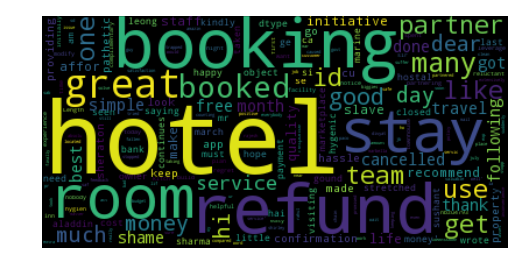

Negatif :


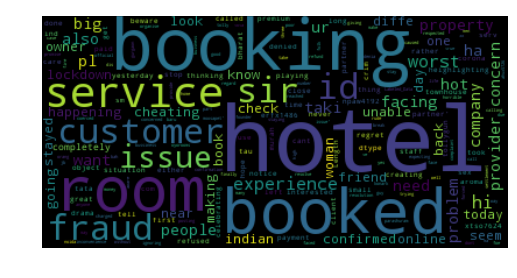

Netral :


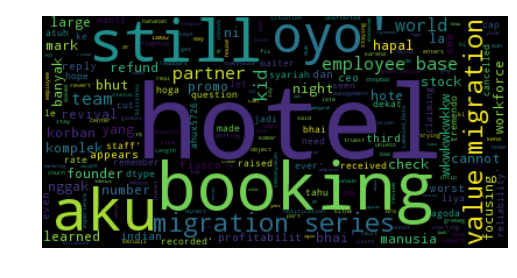

In [113]:

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Start with one review:
# text = df.data_label
pos_word = str(pos.Labeled_Data)
neg_word = str(neg.Labeled_Data)
net_word = str(net.Labeled_Data)
# Create and generate a word cloud image:
print ("Positif :")
wordcloud_pos = WordCloud(stopwords=["oyo"," oyo "," oyo","rt","think", "refund'"]).generate(pos_word)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud_pos.to_file("WC/NBC_pos.png")
print ("Negatif :")
wordcloud_neg = WordCloud(stopwords=["oyo"," oyo "," oyo","rt","think"]).generate(neg_word)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud_neg.to_file("WC/NBC_neg.png")
print ("Netral :")
wordcloud_net = WordCloud(stopwords=["oyo","oyo '  "," oyo","rt","think","ritesh","agarwal","di"]).generate(net_word)
plt.imshow(wordcloud_net, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud_net.to_file("WC/NBC_net.png")

# Word Cloud SVM

In [91]:
df = pd.read_csv('Hasil_SVM.csv')
neg = df.loc[df['Label'] == 'negative'] 
pos = df.loc[df['Label'] == 'positive'] 
net = df.loc[df['Label'] == 'neutral']

Positif :


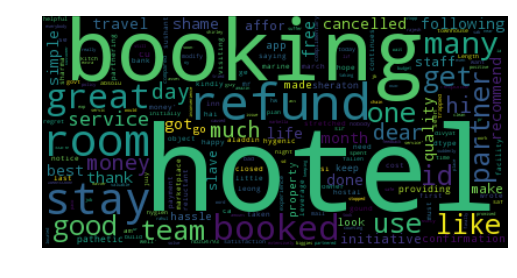

Negatif :


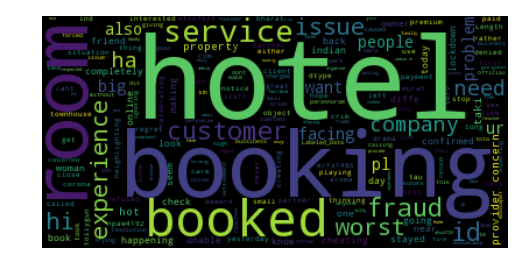

Netral :


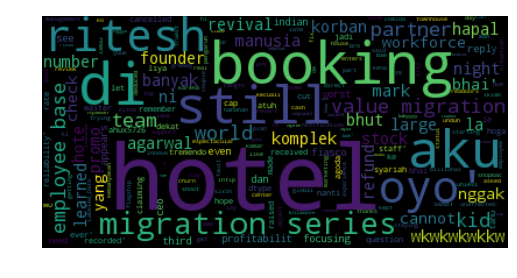

In [116]:

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Start with one review:
# text = df.data_label
pos_word = str(pos.Labeled_Data)
neg_word = str(neg.Labeled_Data)
net_word = str(net.Labeled_Data)
# Create and generate a word cloud image:
print ("Positif :")
wordcloud_pos = WordCloud(stopwords=["oyo"," oyo "," oyo","rt","think","refund'"]).generate(pos_word)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud_pos.to_file("WC/SVM_pos.png")
print ("Negatif :")
wordcloud_neg = WordCloud(stopwords=["oyo"," oyo "," oyo","rt","think","sir"]).generate(neg_word)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud_neg.to_file("WC/SVM_neg.png")
print ("Netral :")
wordcloud_net = WordCloud(stopwords=["oyo"," oyo ' "," oyo' "," oyo","rt","think","bhai '"]).generate(net_word)
plt.imshow(wordcloud_net, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud_net.to_file("WC/SVM_net.png")